In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import  seaborn as sns
import scipy.stats as st

Loading Data


In [3]:
df =  pd.read_parquet("yellow_tripdata_2024-01.parquet","pyarrow")

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


Exploratory Data analysis


In [5]:
df.shape

(2964624, 19)

In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

Finding the duration of the trip


In [7]:

df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [8]:
#Converting pickup and Dropoff time to Datetime format
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [9]:
#Calculating the time taken from pickup to Dropoff  
df["trip_duration"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]

In [10]:
#Converting Datatiime to numeric Format
df["trip_duration"] = df["trip_duration"].dt.total_seconds()/60
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,19.800000
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,6.600000
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,17.916667
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,8.300000
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,6.100000


In [11]:
#picking Out the relvant features for our research objective
df_filterd = df[["passenger_count","payment_type","fare_amount","trip_distance","trip_duration"]].copy(deep=True)

In [12]:
df_filterd.head()

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
0,1.0,2,17.7,1.72,19.800000
1,1.0,1,10.0,1.80,6.600000
2,1.0,1,23.3,4.70,17.916667
3,1.0,1,10.0,1.40,8.300000
4,1.0,1,7.9,0.80,6.100000


In [13]:
#hecking for the propotion of Null Values in Differnet Features
for i in df_filterd.columns:
    print(f"Null value percent for Feature {i} = ",
        df_filterd[i].isnull().sum()/len(df_filterd)*100)
#As the maximum amount of null values is less then 5% we will remove them    

Null value percent for Feature passenger_count =  4.727817085741734
Null value percent for Feature payment_type =  0.0
Null value percent for Feature fare_amount =  0.0
Null value percent for Feature trip_distance =  0.0
Null value percent for Feature trip_duration =  0.0


In [14]:
df_filterd.dropna(inplace= True)

In [15]:
#Changing the numerically encoded Categorical Values to Numerical Values 
df_filterd["passenger_count"] = df_filterd["passenger_count"].astype("int64")
df_filterd["payment_type"] = df_filterd["payment_type"].astype("int64")

In [16]:
#Droping Duplicatates as they do not contribute in the analysis
df_filterd.drop_duplicates(inplace=True)

In [17]:
df_filterd.shape

(1682947, 5)

In [18]:
#checking for outliers in the data by Finding the propotions of different Unique Values in the Data
for i in df_filterd.columns:
    if df_filterd[i].dtype == int:
        print(f"unique values for Feature {i} = ",
            df_filterd[i].unique())
        print(f"Unique value counts for {i} = ","\n",df_filterd[i].value_counts(normalize=True)*100)
    

unique values for Feature passenger_count =  [1 2 0 4 3 5 6 8 7 9]
Unique value counts for passenger_count =  
 passenger_count
1    68.519448
2    18.742836
3     5.001821
4     2.961769
5     1.926858
0     1.545563
6     1.298496
8     0.002674
7     0.000475
9     0.000059
Name: proportion, dtype: float64
unique values for Feature payment_type =  [2 1 4 3]
Unique value counts for payment_type =  
 payment_type
1    75.983141
2    20.534871
4     2.542385
3     0.939602
Name: proportion, dtype: float64


In [19]:
#Removing data with Passenger Count less than 1 and greater than 5 
#Removing Data with payment type greator than 2 as 1,2 Correspond to payment type Cash,Card respectively
df_filterd =df_filterd[(df_filterd["passenger_count"]>0) & (df_filterd["passenger_count"]<5) ]
df_filterd =df_filterd[(df_filterd["payment_type"]<3) ]

In [20]:
df_filterd.shape

(1545380, 5)

In [21]:
#Checking For the propotions of Unique Values in the data
for i in df_filterd.columns:
    if df_filterd[i].dtype == int:
        print(f"unique values for Feature {i} = ",
            df_filterd[i].unique())
        print(f"Unique value counts for {i} = ",df_filterd[i].value_counts(normalize=True)*100)
    

unique values for Feature passenger_count =  [1 2 4 3]
Unique value counts for passenger_count =  passenger_count
1    71.721389
2    19.851752
3     5.315003
4     3.111856
Name: proportion, dtype: float64
unique values for Feature payment_type =  [2 1]
Unique value counts for payment_type =  payment_type
1    78.549095
2    21.450905
Name: proportion, dtype: float64


In [22]:
df_filterd["payment_type"].replace([1,2],["Card","Cash"],inplace= True)

/tmp/ipykernel_1833/4225996385.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filterd["payment_type"].replace([1,2],["Card","Cash"],inplace= True)


In [23]:
#Checking for the Statistical Summary of the data
df_filterd.describe()

,passenger_count,fare_amount,trip_distance,trip_duration
count,1.545380e+06,1.545380e+06,1.545380e+06,1.545380e+06
mean,1.398173e+00,2.434726e+01,4.690074e+00,2.058240e+01
std,7.298240e-01,2.123491e+01,1.617530e+01,4.416649e+01
min,1.000000e+00,-8.990000e+02,0.000000e+00,-1.356667e+01
25%,1.000000e+00,1.140000e+01,1.410000e+00,1.021667e+01
50%,1.000000e+00,1.770000e+01,2.540000e+00,1.618333e+01
75%,2.000000e+00,2.890000e+01,5.420000e+00,2.443333e+01
max,4.000000e+00,2.221300e+03,1.540032e+04,9.455400e+03


In [24]:
#Removing Data with fare amount less than 0 and trip duration less than 0 as both are logically improable
df_filterd = df_filterd[df_filterd["fare_amount"] > 0]
df_filterd = df_filterd[df_filterd["trip_duration"] > 0] 

In [25]:
df_filterd.describe()

,passenger_count,fare_amount,trip_distance,trip_duration
count,1.537116e+06,1.537116e+06,1.537116e+06,1.537116e+06
mean,1.398371e+00,2.458148e+01,4.696664e+00,2.062029e+01
std,7.299083e-01,2.093848e+01,1.621293e+01,4.423630e+01
min,1.000000e+00,1.000000e-02,0.000000e+00,1.666667e-02
25%,1.000000e+00,1.140000e+01,1.420000e+00,1.025000e+01
50%,1.000000e+00,1.770000e+01,2.550000e+00,1.621667e+01
75%,2.000000e+00,2.960000e+01,5.430000e+00,2.446667e+01
max,4.000000e+00,2.221300e+03,1.540032e+04,9.455400e+03


Text(0.5, 1.0, 'Boxplot of trip_duration"')

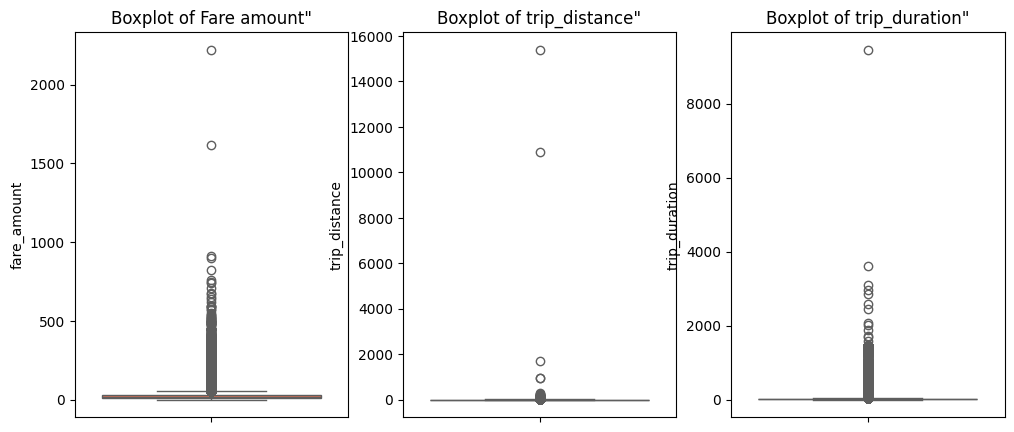

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(data=df_filterd["fare_amount"],ax=axes[0],color="#FA633F")
axes[0].set_title('Boxplot of Fare amount"')

sns.boxplot(data=df_filterd["trip_distance"],ax=axes[1],color="#FA633F")
axes[1].set_title('Boxplot of trip_distance"')

sns.boxplot(data=df_filterd["trip_duration"],ax=axes[2],color="#FA633F")
axes[2].set_title('Boxplot of trip_duration"')



In [27]:
for col in ["fare_amount","trip_distance","trip_duration"]:
    q1= df[col].quantile(0.25)
    q3 =df[col].quantile(0.75)
    IQR = q3 -q1
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR
    df_filterd = df_filterd[(df_filterd[col]>= lower_bound)&(df_filterd[col]<= upper_bound)]

Text(0.5, 1.0, 'Boxplot of trip_duration"')

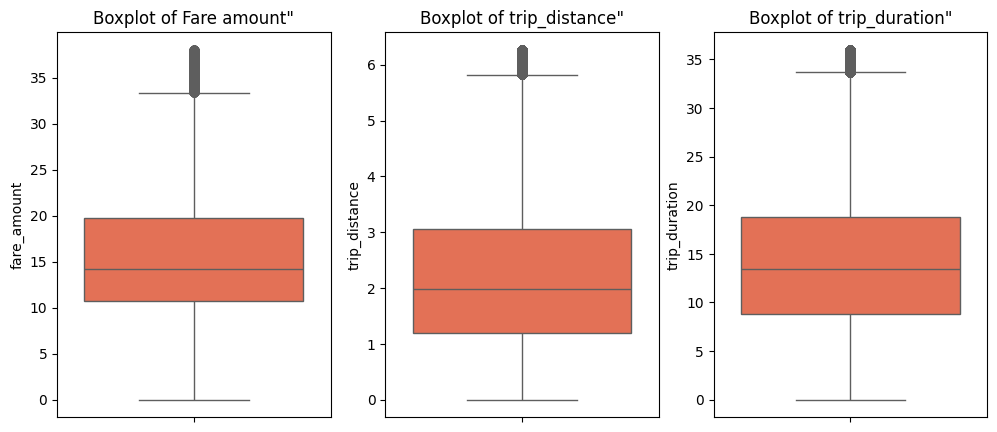

In [28]:


fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(data=df_filterd["fare_amount"],ax=axes[0],color="#FA633F")
axes[0].set_title('Boxplot of Fare amount"')

sns.boxplot(data=df_filterd["trip_distance"],ax=axes[1],color="#FA633F")
axes[1].set_title('Boxplot of trip_distance"')

sns.boxplot(data=df_filterd["trip_duration"],ax=axes[2],color="#FA633F")
axes[2].set_title('Boxplot of trip_duration"')





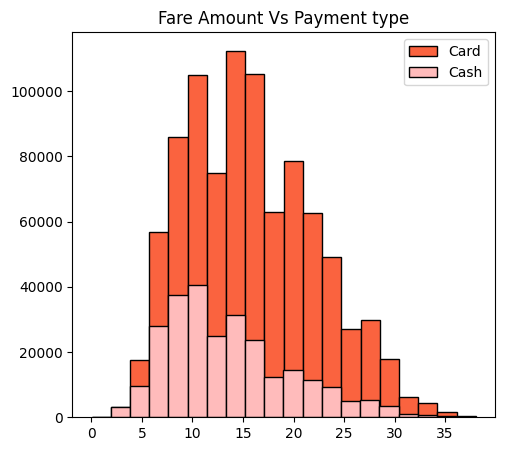

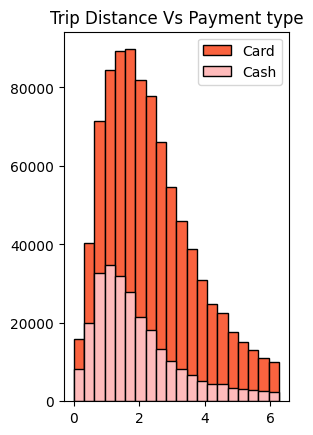

In [29]:
#Visualizing the distribution of Trip distance and Fare amount for Cash or Card Payment
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
plt.title("Fare Amount Vs Payment type")
plt.hist(df_filterd[df_filterd["payment_type"] == "Card"]["fare_amount"],histtype="barstacked",bins=20,edgecolor = "k",color="#FA633F",label="Card")
plt.hist(df_filterd[df_filterd["payment_type"] == "Cash"]["fare_amount"],histtype="barstacked",bins=20,edgecolor = "k",color="#FFBBBB",label="Cash")
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.title("Trip Distance Vs Payment type")
plt.hist(df_filterd[df_filterd["payment_type"] == "Card"]["trip_distance"],histtype="barstacked",bins=20,edgecolor = "k",color="#FA633F",label="Card")
plt.hist(df_filterd[df_filterd["payment_type"] == "Cash"]["trip_distance"],histtype="barstacked",bins=20,edgecolor = "k",color="#FFBBBB",label="Cash")
plt.legend()
plt.show()

In [30]:
df_filterd.groupby("payment_type").agg({"fare_amount":["mean","std"],"trip_distance":["mean","std"]})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           15.822621  6.374937      2.351799  1.367208
Cash           13.594185  6.173732      1.939767  1.315340

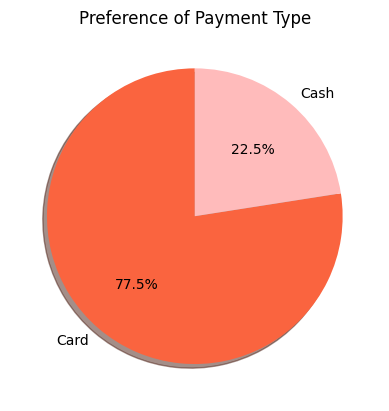

In [31]:
plt.title("Preference of Payment Type")
plt.pie(df_filterd["payment_type"].value_counts(normalize = True),labels=df_filterd["payment_type"].value_counts().index,
        startangle= 90,shadow=True,autopct="%1.1f%%",colors=["#FA643F","#FFBBBB"])
plt.show()

In [32]:
passenger_count = df_filterd.groupby(["payment_type","passenger_count"])[["passenger_count"]].count()
passenger_count.rename(columns={"passenger_count":"count"},inplace=True)
passenger_count

count
payment_type passenger_count        
Card         1                630114
             2                188947
             3                 54102
             4                 28855
Cash         1                189549
             2                 49771
             3                 13304
             4                  9678

In [33]:
passenger_count["perc"] = passenger_count["count"]/passenger_count["count"].sum()*100
passenger_count

count       perc
payment_type passenger_count                   
Card         1                630114  54.118627
             2                188947  16.228099
             3                 54102   4.646661
             4                 28855   2.478271
Cash         1                189549  16.279803
             2                 49771   4.274684
             3                 13304   1.142641
             4                  9678   0.831215

In [34]:
df_Passenger_count = pd.DataFrame(columns=["payment_type",1,2,3,4])
df_Passenger_count["payment_type"] = ["card","cash"]
df_Passenger_count.iloc[0,1:] = passenger_count.iloc[0:4,-1]
df_Passenger_count.iloc[1,1:] = passenger_count.iloc[4:,-1]

In [35]:
df_Passenger_count

,payment_type,1,2,3,4
0,card,54.118627,16.228099,4.646661,2.478271
1,cash,16.279803,4.274684,1.142641,0.831215


<Axes.ArtistList of 8 patches>


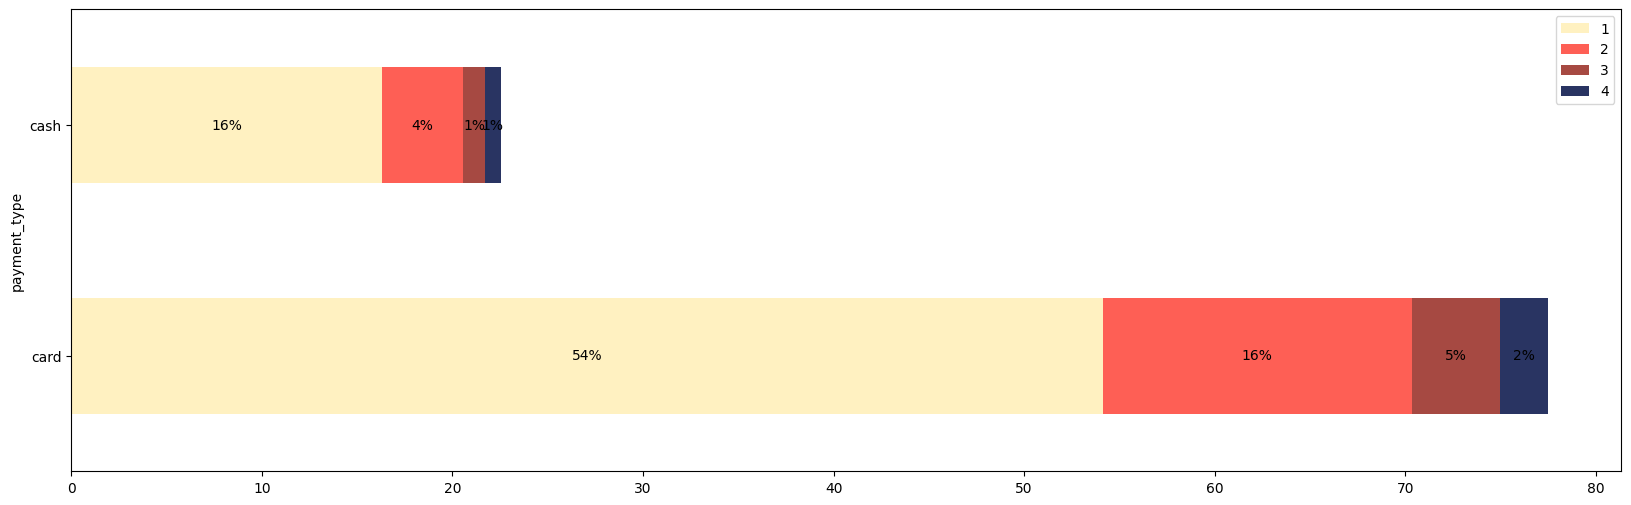

In [36]:
fig,ax = plt.subplots(figsize = (20,6))
df_Passenger_count.plot(x = "payment_type",kind = "barh",stacked=True,ax=ax,color = ["#FFF1C1","#FE5F55","#A64942","#293462"])
print(ax.patches)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    ax.text(x + width/2,
           y + height/2,
           "{:.0f}%".format(width),
           horizontalalignment = "center",
           verticalalignment = "center")


<b>NUll hypothesis</b> : There is no difference in avg fair between customers who use Cards and Customers who use cash <br>

<b>Alternative hypothesis</b> :There is a difference in avg fair between customers who use Cards and Customers who use cash

Checking Normal distribution using QQ plot


In [37]:
import statsmodels.api as sm 

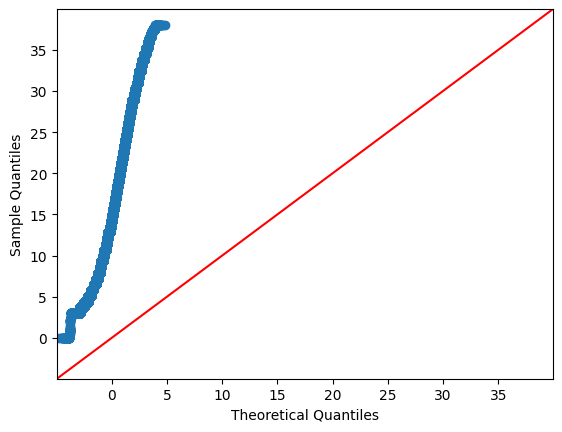

In [38]:
sm.qqplot(df_filterd["fare_amount"],line = "45")
plt.show()

Will use t-test bcuz the absence of polpulation std.div and the data not being normally distributed

In [39]:
Card_sample = df_filterd[df_filterd["payment_type"]=="Card"]["fare_amount"]
Cash_sample = df_filterd[df_filterd["payment_type"]=="Cash"]["fare_amount"]

In [40]:
t_stats,p_value = st.ttest_ind(a = Card_sample,b=Cash_sample,equal_var = False)
print(f"T statistic= {t_stats},p-value = {p_value}")

T statistic= 161.51317177741868,p-value = 0.0
